In [2]:
from transformers import BertModel, BertTokenizer, BertForMaskedLM
from transformers import RobertaModel, RobertaTokenizer, RobertaForMaskedLM
import matplotlib.pyplot as plt

I1024 21:03:23.960961  9236 file_utils.py:32] TensorFlow version 2.0.0 available.
I1024 21:03:24.323658  9236 file_utils.py:39] PyTorch version 1.3.0 available.
I1024 21:03:24.767267  9236 modeling_xlnet.py:194] Better speed can be achieved with apex installed from https://www.github.com/nvidia/apex .


In [2]:
Roberta_path = "E:\\LangOn\\Roberta\\etc\\RoBERTa_zh_L12_PyTorch"

In [3]:
tokenizer = BertTokenizer.from_pretrained('bert-base-chinese')

I1024 21:03:25.794617  9236 tokenization_utils.py:374] loading file https://s3.amazonaws.com/models.huggingface.co/bert/bert-base-chinese-vocab.txt from cache at C:\Users\seantyh\.cache\torch\transformers\8a0c070123c1f794c42a29c6904beb7c1b8715741e235bee04aca2c7636fc83f.9b42061518a39ca00b8b52059fd2bede8daa613f8a8671500e518a8c29de8c00


In [4]:
lm = BertForMaskedLM.from_pretrained('bert-base-chinese')

I1024 21:03:43.660394  9236 configuration_utils.py:151] loading configuration file https://s3.amazonaws.com/models.huggingface.co/bert/bert-base-chinese-config.json from cache at C:\Users\seantyh\.cache\torch\transformers\8a3b1cfe5da58286e12a0f5d7d182b8d6eca88c08e26c332ee3817548cf7e60a.0c16faba8be66db3f02805c912e4cf94d3c9cffc1f12fa1a39906f9270f76d33
I1024 21:03:43.666338  9236 configuration_utils.py:168] Model config {
  "attention_probs_dropout_prob": 0.1,
  "directionality": "bidi",
  "finetuning_task": null,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "num_labels": 2,
  "output_attentions": false,
  "output_hidden_states": false,
  "output_past": true,
  "pooler_fc_size": 768,
  "pooler_num_attention_heads": 12,
  "pooler_num_fc_layers": 3,
  "pooler_size_per_head": 128,
  "poo

In [17]:
ids = tokenizer.encode("今天星期三", add_special_tokens=True)

In [18]:
ids

[101, 791, 1921, 3215, 3309, 676, 102]

In [6]:
import torch

In [7]:
with torch.no_grad():
    probs = lm(torch.tensor([ids]))

In [8]:
torch.softmax(probs[0], 2).shape

torch.Size([1, 7, 21128])

In [15]:
A = torch.tensor([[1,2],[3,4]])
A

tensor([[1, 2],
        [3, 4]])

In [31]:
torch.gather(A, 0, torch.tensor([[0,0],[1,0]]))

tensor([[1, 2],
        [3, 2]])

In [29]:
torch.gather(A, 1, torch.tensor([[0,0],[1,0]]))

tensor([[1, 1],
        [4, 3]])

In [32]:
ids

[791, 1921, 3215, 3309, 676]

In [37]:
def get_char_prob(text, lm):
    ids = tokenizer.encode(text)
    print(ids)
    with torch.no_grad():        
        logits = lm(torch.tensor([ids]))
    indices = torch.tensor(ids).unsqueeze(0).unsqueeze(2)
    probs = torch.gather(torch.softmax(logits[0], 2), 2, indices)    
    probs = probs.squeeze().numpy()
    return probs

In [33]:
ids = tokenizer.encode("星期三")
with torch.no_grad():        
    logits = lm(torch.tensor([ids]))

In [21]:
logits[0][:, -1, :]

tensor([[-13.3469, -12.9345, -13.7185,  ..., -12.4337, -10.0349, -11.4409]])

In [22]:
sorted_ids = torch.argsort(logits[0][:,-1,:], 1, descending=True).squeeze()[:10]


In [23]:
tokenizer.decode(sorted_ids.numpy())

'三 二 五 四 後 地 果 一 高 六'

In [34]:
def get_char_candidate(text, lm):
    ids = tokenizer.encode(text)
    with torch.no_grad():        
        logits = lm(torch.tensor([ids]))
    last_logit = logits[0][:,-1]
    torch.argsort(last_logit)    
    return probs

[2769, 4696, 4638, 679, 4761, 6887, 6857, 3564, 1962, 679, 1962]
[2769, 4696, 4638, 679, 4761, 100, 6857, 3564, 1962, 679, 1962]


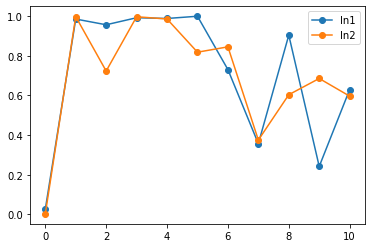

In [38]:
ln1 = get_char_prob("我真的不知道這樣好不好", lm)
ln2 = get_char_prob("我真的不知晪這樣好不好", lm)
plt.plot(ln1, 'o-', label='ln1')
plt.plot(ln2, 'o-', label='ln2')
plt.legend()

[791, 3189, 1453, 2399, 2723, 1059, 7631, 1920, 2864, 6546]
[791, 3189, 1453, 2399, 2723, 1059, 7631, 1920, 6525, 6546]


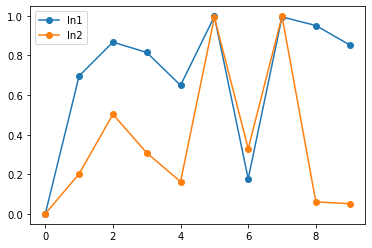

In [40]:
ln1 = get_char_prob("今日周年慶全館大拍賣", lm)
ln2 = get_char_prob("今日周年慶全館大買賣", lm)
plt.plot(ln1, 'o-', label='ln1')
plt.plot(ln2, 'o-', label='ln2')
plt.legend()